In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('../data/full_gross.csv', index_col='Unnamed: 0')

In [31]:
df.head()

,averagerating,numvotes,title,genres,Sport,Fantasy,Mystery,War,Biography,Drama,...,Documentary,Sci-Fi,Action,Thriller,Music,Animation,year,dom_gross,for_gross,world_gross
0,4.2,50352,The Legend of Hercules,"Action,Adventure,Fantasy",False,True,False,False,False,False,...,False,False,True,False,False,False,2014,18800000.0,42400000.0,61200000.0
1,5.1,8296,Baggage Claim,Comedy,False,False,False,False,False,False,...,False,False,False,False,False,False,2013,21600000.0,887000.0,22487000.0
3,7.6,326657,Moneyball,"Biography,Drama,Sport",True,False,False,False,True,True,...,False,False,False,False,False,False,2011,75600000.0,34600000.0,110200000.0
4,6.5,87288,Hereafter,"Drama,Fantasy,Romance",False,True,False,False,False,True,...,False,False,False,False,False,False,2010,32700000.0,72500000.0,105200000.0
5,7.4,428142,Mission: Impossible - Ghost Protocol,"Action,Adventure,Thriller",False,False,False,False,False,False,...,False,False,True,True,False,False,2011,209400000.0,485300000.0,694700000.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2966 entries, 0 to 2982
Data columns (total 27 columns):
averagerating    2966 non-null float64
numvotes         2966 non-null int64
title            2966 non-null object
genres           2966 non-null object
Sport            2966 non-null bool
Fantasy          2966 non-null bool
Mystery          2966 non-null bool
War              2966 non-null bool
Biography        2966 non-null bool
Drama            2966 non-null bool
Comedy           2966 non-null bool
History          2966 non-null bool
Crime            2966 non-null bool
Horror           2966 non-null bool
Family           2966 non-null bool
Adventure        2966 non-null bool
Romance          2966 non-null bool
Documentary      2966 non-null bool
Sci-Fi           2966 non-null bool
Action           2966 non-null bool
Thriller         2966 non-null bool
Music            2966 non-null bool
Animation        2966 non-null bool
year             2966 non-null int64
dom_gross        296

In [43]:
low_votes = df[(df['numvotes'] > 250000) | (df['numvotes'] < 1000)].index
df2 = df.drop(low_votes)

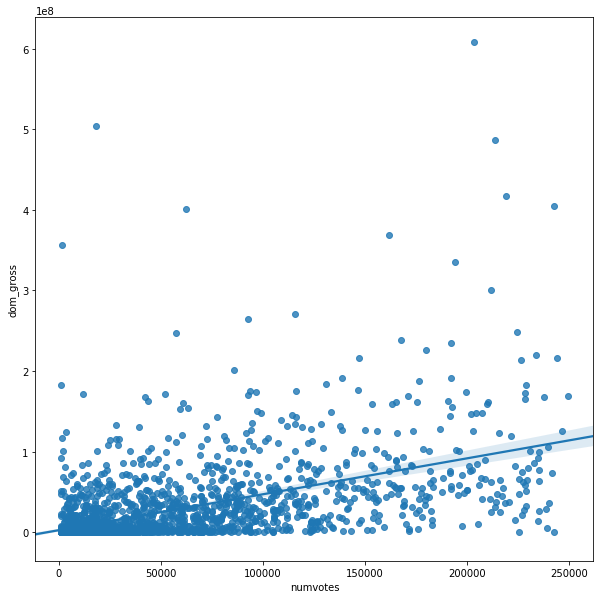

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x=df2["numvotes"], y=df2["dom_gross"], fit_reg=True)



In [18]:
df.loc[df['dom_gross'] == df['dom_gross'].max()]

,averagerating,numvotes,title,genres,Sport,Fantasy,Mystery,War,Biography,Drama,...,Documentary,Sci-Fi,Action,Thriller,Music,Animation,year,dom_gross,for_gross,world_gross
144,6.1,43,Avatar,Horror,False,False,False,False,False,False,...,False,False,False,False,False,False,2009,760507625.0,2.015838e+09,2.776345e+09


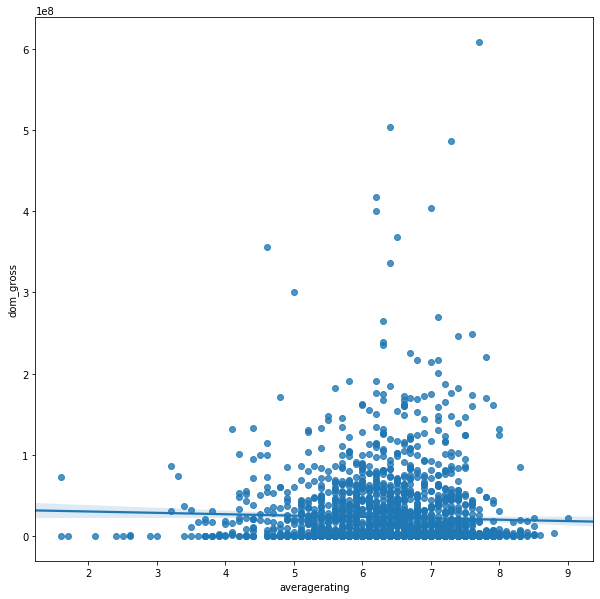

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x=df2["averagerating"], y=df2["dom_gross"], fit_reg=True)

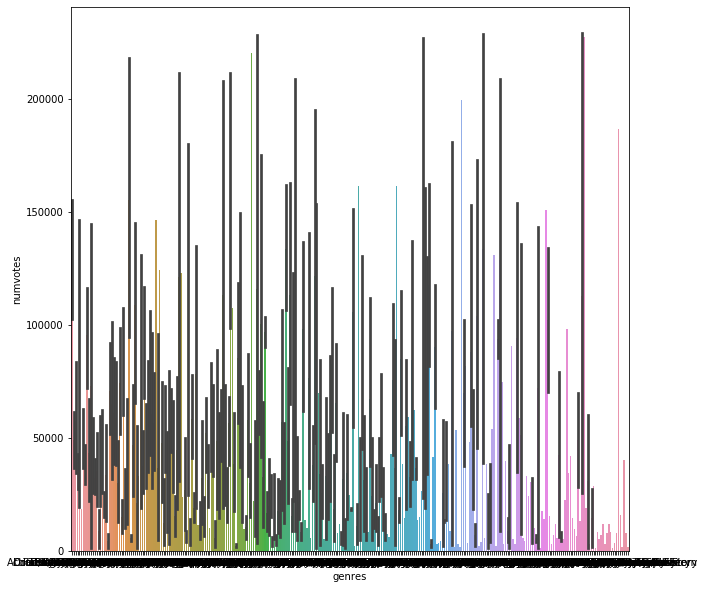

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df2["dom"], y=df2["numvotes"])

In [55]:
table1 = pd.pivot_table(df, index=['genres'], values ='dom_gross', aggfunc=['mean','median','std','count'])
table1 = pd.DataFrame(table1, ascending=False)
# table1.columns = table1.columns.to_series().str.join('_')
# table1 = pd.DataFrame(table1.sort_values('median_worldwide_roi', ascending=False))
# table1 = pd.DataFrame(table1.loc[table1['count_worldwide_roi']>9].reset_index())
# table1.columns = ['genre_groupings', 'mean_worldwide_roi', 'median_worldwide_roi',
#        'std_worldwide_roi', 'count_worldwide_roi']
# table1[['genre_groupings','median_worldwide_roi','std_worldwide_roi','count_worldwide_roi']].head()

In [56]:
table1

,mean,median,std,count
,dom_gross,dom_gross,dom_gross,dom_gross
Action,1.294832e+07,363500.0,3.853343e+07,12
"Action,Adventure",5.408333e+04,23450.0,6.775132e+04,6
"Action,Adventure,Animation",1.035729e+08,57490777.5,1.332569e+08,26
"Action,Adventure,Biography",6.307782e+07,34241135.0,8.227895e+07,4
"Action,Adventure,Comedy",1.060563e+08,33600000.0,1.317971e+08,35
"Action,Adventure,Crime",3.057040e+07,16000000.0,5.935783e+07,9
"Action,Adventure,Drama",4.644647e+07,28461850.5,5.425853e+07,36
"Action,Adventure,Family",9.173180e+07,78300000.0,8.737395e+07,6
"Action,Adventure,Fantasy",1.313861e+08,72688614.0,1.368468e+08,37
